In [84]:
# Notebook setup
import requests
import os
import re
import xarray as xr
!pip install netcdf4
import pandas as pd
import matplotlib.pyplot as plt

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

In [85]:
# link to the central offshore mooring CTD
CO_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'

In [86]:
ds = xr.open_dataset(CO_URL)
ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
print('Dataset has %d points' % ds.time.size)

Dataset has 236989 points


In [87]:
ds

<xarray.Dataset>
Dimensions:                                          (time: 236989)
Coordinates:
    obs                                              (time) int32 0 1 ... 236988
    lon                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
Data variables:
    practical_salinity                               (time) float64 ...
    ctdpf_ckl_seawater_conductivity_qc_results       (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 ...
    ctdpf_ckl_seawater_pressure_qc_executed          (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_results        (time) float32 ...
    density_qc_executed                              (time) float32 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    practical_salinity_qc_results                    (time) float32 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 ...
    deployment                                       (time) int32 ...
    ctdpf_ckl_seawater_pressure_qc_results           (time) float32 ...
    preferred_timestamp                              (time) object ...
    practical_salinity_qc_executed                   (time) float32 ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
    density_qc_results                               (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_executed       (time) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:32:48.283996
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:32:48.283994
    id:                              CP02PMCO-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     f25e5b91-10b0-48ab-8c76-96e70aee683b
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                 

In [88]:
ds.practical_salinity

<xarray.DataArray 'practical_salinity' (time: 236989)>
[236989 values with dtype=float64]
Coordinates:
    obs       (time) int32 0 1 2 3 4 5 ... 236984 236985 236986 236987 236988
    lon       (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-08T14:00:03 ... 2019-10-31T21:25:...
    pressure  (time) float64 ...
    lat       (time) float64 ...
Attributes:
    comment:                  Salinity is generally defined as the concentrat...
    long_name:                Practical Salinity
    precision:                4
    data_product_identifier:  PRACSAL_L2
    standard_name:            sea_water_practical_salinity
    units:                    1
    ancillary_variables:      pressure conductivity temperature
    _ChunkSizes:              10000

In [89]:
ds.practical_salinity.coords["time"]

<xarray.DataArray 'time' (time: 236989)>
array(['2019-10-08T14:00:03.000000000', '2019-10-08T14:00:04.007961600',
       '2019-10-08T14:00:05.015923712', ..., '2019-10-31T21:25:27.951534592',
       '2019-10-31T21:25:28.967689728', '2019-10-31T21:25:29.983844864'],
      dtype='datetime64[ns]')
Coordinates:
    obs       (time) int32 0 1 2 3 4 5 ... 236984 236985 236986 236987 236988
    lon       (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-08T14:00:03 ... 2019-10-31T21:25:...
    pressure  (time) float64 ...
    lat       (time) float64 ...
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
    _ChunkSizes:    512

In [90]:
ds.practical_salinity.attrs

{'comment': 'Salinity is generally defined as the concentration of dissolved salt in a parcel of seawater. Practical Salinity is a more specific unitless quantity calculated from the conductivity of seawater and adjusted for temperature and pressure. It is approximately equivalent to Absolute Salinity (the mass fraction of dissolved salt in seawater) but they are not interchangeable.',
 'long_name': 'Practical Salinity',
 'precision': 4,
 'data_product_identifier': 'PRACSAL_L2',
 'standard_name': 'sea_water_practical_salinity',
 'units': '1',
 'ancillary_variables': 'pressure conductivity temperature',
 '_ChunkSizes': 10000}

In [91]:
ds.practical_salinity.data

array([36.05236048, 36.05215852, 36.05281081, ..., 35.85544878,
       35.85544375, 35.85526054])

In [92]:
type(ds.practical_salinity.data)

numpy.ndarray

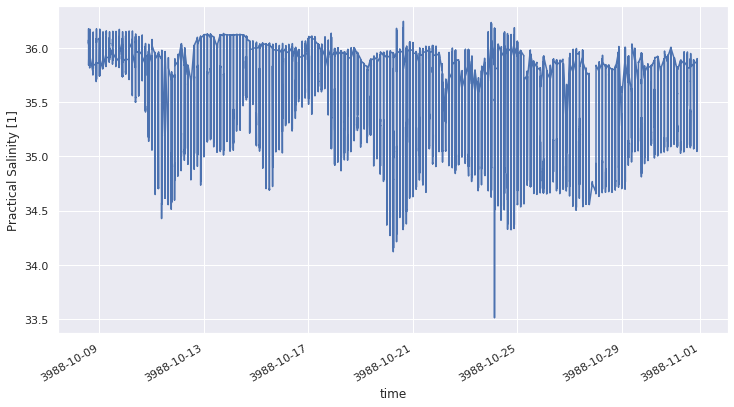

In [93]:
plt.figure(figsize=[12, 6])
ds.practical_salinity.plot(x="time")

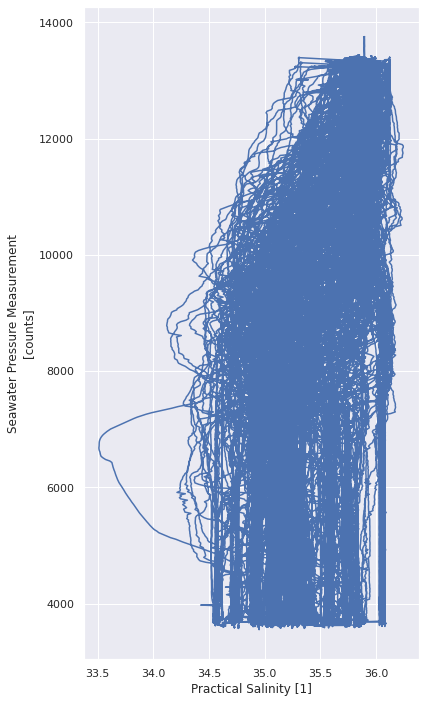

In [116]:
plt.figure(figsize=[6,12])
ds.practical_salinity.plot(y="pressure")

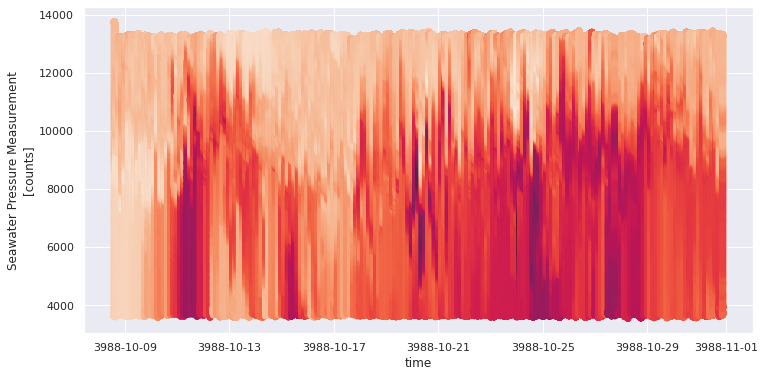

In [117]:
# does anyone know how to plot these fields in a contour plot??
plt.figure(figsize=[12,6])
ds.plot.scatter(x="time", y="pressure", c=ds.practical_salinity.data)

In [96]:
ds.sel(time="2019-10-15")

<xarray.Dataset>
Dimensions:                                          (time: 9855)
Coordinates:
    obs                                              (time) int32 66351 ... 7...
    lon                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
Data variables:
    practical_salinity                               (time) float64 36.0 ... ...
    ctdpf_ckl_seawater_conductivity_qc_results       (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 b'11111111111111111...
    ctdpf_ckl_seawater_pressure_qc_executed          (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_results        (time) float32 ...
    density_qc_executed                              (time) float32 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    practical_salinity_qc_results                    (time) float32 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 b'11111111111111111...
    deployment                                       (time) int32 ...
    ctdpf_ckl_seawater_pressure_qc_results           (time) float32 ...
    preferred_timestamp                              (time) object ...
    practical_salinity_qc_executed                   (time) float32 ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
    density_qc_results                               (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_executed       (time) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:32:48.283996
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:32:48.283994
    id:                              CP02PMCO-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     f25e5b91-10b0-48ab-8c76-96e70aee683b
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobs

In [97]:
# demonstrate slicing
ds.sel(time=slice("2019-10-10", "2019-10-20"))

<xarray.Dataset>
Dimensions:                                          (time: 113134)
Coordinates:
    obs                                              (time) int32 14160 ... 1...
    lon                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
Data variables:
    practical_salinity                               (time) float64 35.89 ......
    ctdpf_ckl_seawater_conductivity_qc_results       (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 b'11111111111111111...
    ctdpf_ckl_seawater_pressure_qc_executed          (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_results        (time) float32 ...
    density_qc_executed                              (time) float32 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    practical_salinity_qc_results                    (time) float32 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 b'11111111111111111...
    deployment                                       (time) int32 ...
    ctdpf_ckl_seawater_pressure_qc_results           (time) float32 ...
    preferred_timestamp                              (time) object ...
    practical_salinity_qc_executed                   (time) float32 ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
    density_qc_results                               (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_executed       (time) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:32:48.283996
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:32:48.283994
    id:                              CP02PMCO-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     f25e5b91-10b0-48ab-8c76-96e70aee683b
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceano

In [98]:
# demonstrate "nearest" indexing
ds.sel(time="2019-10-15T00:00:30", method="nearest")

<xarray.Dataset>
Dimensions:                                          (time: 1)
Coordinates:
    obs                                              (time) int32 66379
    lon                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
Data variables:
    practical_salinity                               (time) float64 36.0
    ctdpf_ckl_seawater_conductivity_qc_results       (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 b'11111111111111111...
    ctdpf_ckl_seawater_pressure_qc_executed          (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_results        (time) float32 ...
    density_qc_executed                              (time) float32 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    practical_salinity_qc_results                    (time) float32 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 b'11111111111111111...
    deployment                                       (time) int32 ...
    ctdpf_ckl_seawater_pressure_qc_results           (time) float32 ...
    preferred_timestamp                              (time) object ...
    practical_salinity_qc_executed                   (time) float32 ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
    density_qc_results                               (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_executed       (time) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:32:48.283996
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:32:48.283994
    id:                              CP02PMCO-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     f25e5b91-10b0-48ab-8c76-96e70aee683b
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    